# Strojno i duboko učenje - Konvolucijske neuronske mreže (CNN)


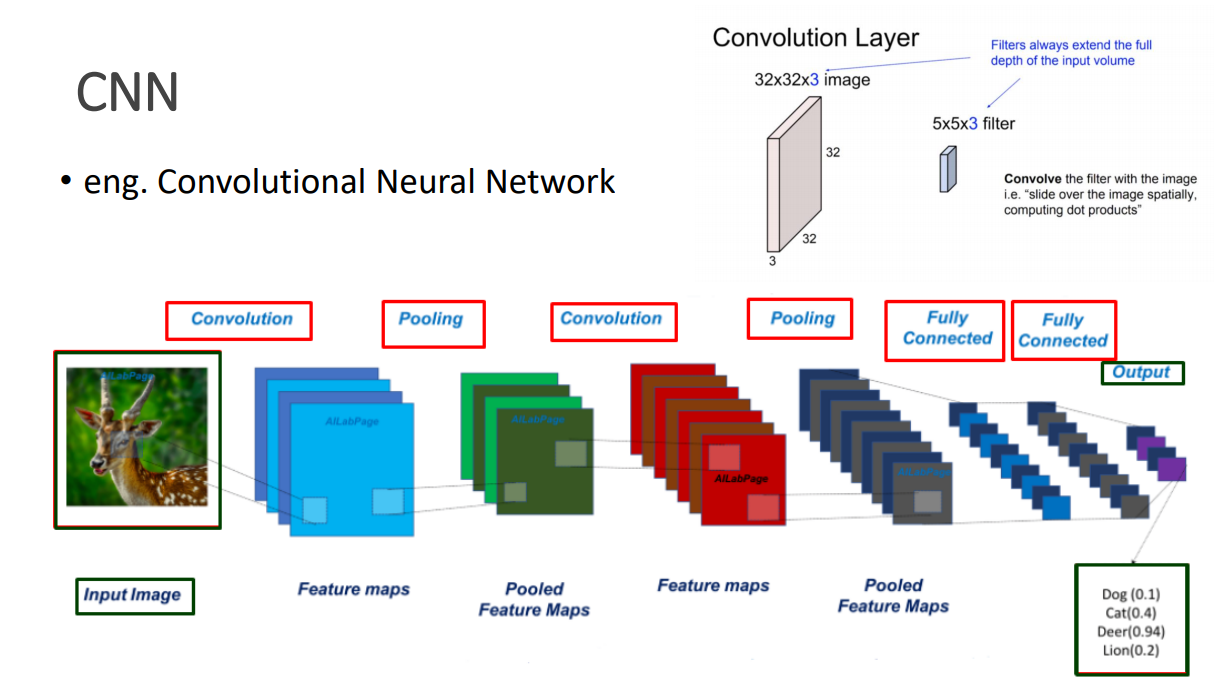

Pogledati više o CNN na:
* https://www.youtube.com/watch?v=K_BHmztRTpA&ab_channel=PacktVideo
* https://www.youtube.com/watch?v=YRhxdVk_sIs&t=358s&ab_channel=deeplizard







##CIFAR-10 dataset



Baza: https://www.cs.toronto.edu/~kriz/cifar.html

- 60.000 slika u boji* veličine 32x32 piksela (50.000 za učenje, 10.000 za testiranje)
 - RGB za svaki piksel promatramo 3 boje -> 32x32x3
- na slikama se nalaze slike aviona, automobila, ptica, mačkača, jelena, psa, žaba, konja, brodova i kamiona
* Svaka slika je označena sa brojem (0-9) koji predstavlja jednu klasu
 * Ukupno imamo 10 klasa
  * 6000 slika za svaku klasu


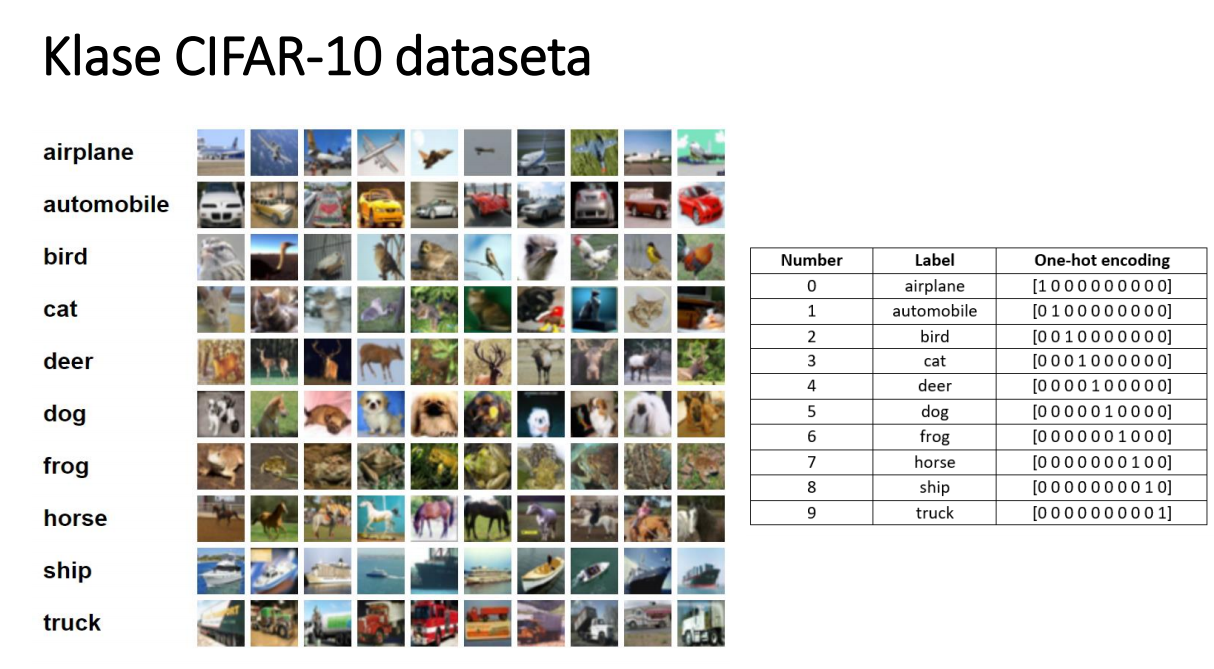

**Provjera i ažuriranje verzija tensorflow**

Potrebne verzije:
- tensorflow:  2.1.0 ili više


In [1]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [2]:
from tensorflow import keras

**Dohvačanje i upravljanje podacima**

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
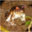

In [9]:
x_train[0]

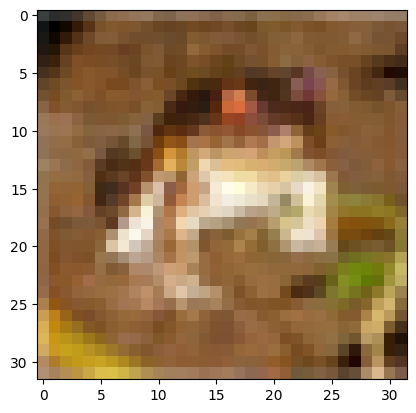

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [11]:
print('Oznaka prve slike:', y_train[0])

Oznaka prve slike: [6]


**One hot encoding**

In [12]:
y_train_one_hot=keras.utils.to_categorical(y_train, 10)
y_test_one_hot=keras.utils.to_categorical(y_test, 10)

**Normalizacija podataka**

Želimo da nam vrijednosti budu između 0 i 1

In [13]:
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [14]:
x_train=x_train/255
x_test=x_test/255

In [15]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## Kreiraje CNN-a

**Arhitektura** CNN-a koji čemo kreirati:


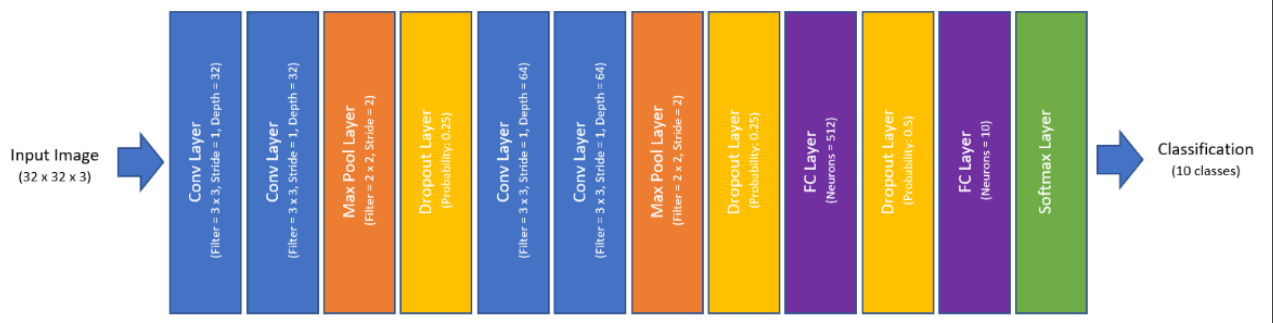



- Conv Layer (Filter size 3x3, Depth 32)
- Conv Layer (Filter size 3x3, Depth 32)
- Max Pool Layer (Filter size 2x2)
- Dropout Layer (Prob of dropout 0.25)
- Conv Layer (Filter size 3x3, Depth 64)
- Conv Layer (Filter size 3x3, Depth 64)
- Max Pool Layer (Filter size 2x2)
- Dropout Layer (Prob of dropout 0.25)
- FC Layer (512 neurons)
- Dropout Layer (Prob of dropout 0.5)
- FC Layer, Softmax (10 neurons)



**Filteri**


*   https://medium.com/@ianormy/convolution-filters-4971820e851f
 * Konvolucijski sloj sastoji se od filtera koji sadrže težine (eng. weights) s kojima je potrebno naučiti mrežu
 * Filteri su manje prostorne jedinice od ulaza, ali jednake dubine!
 * Svaki sloj se najčešće sastoji od više filtera, što više filtera imamo to više značajki može biti prepoznato




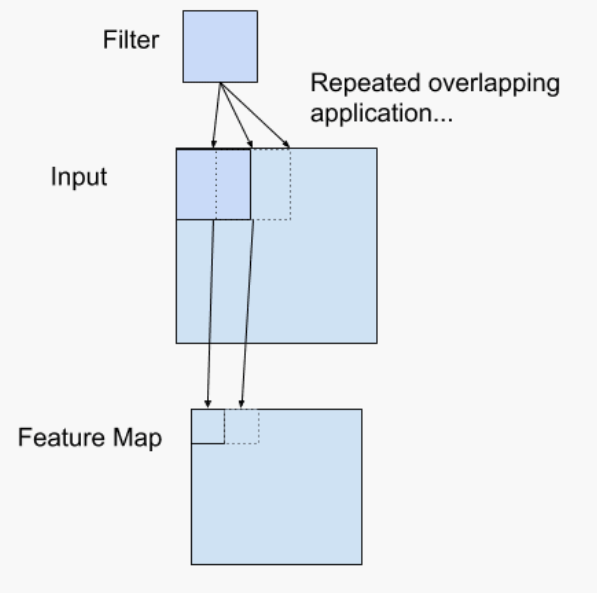

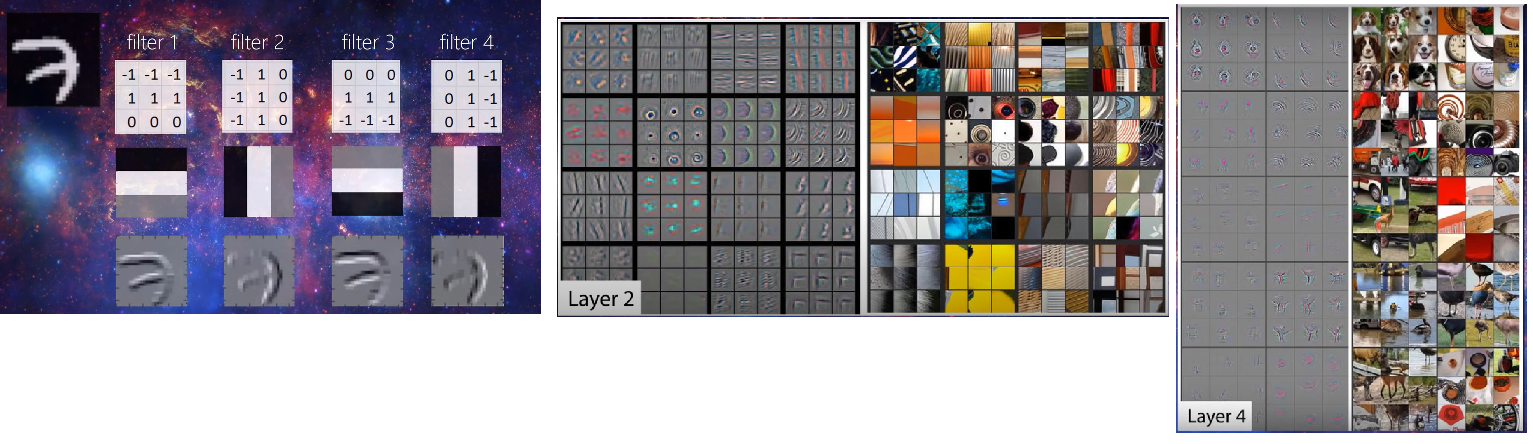

**Korak - stride**

Broj piksela za koji se pomičemo u horizontalnom i vertikalnom smjeru prilikom konvolucije.
Po defoultu korak je jednak 1, odnosno ne preskačemo piksele

**Dopunjavanje - padding**

dodaje 0 oko rubova u mape značajki (eng. feature maps) kako bi kutovi i rubovi fotografije doprinosili prijenosu informacija,  na taj način više puta ulaze u konvoluciju

Također, paddingom možemo upravljati dimenzijom izlazne mape

1.   Valid - nema paddinga
2.   Same - dodajemo onoliko 0 koliko je potrebno da ulazna velicina slika bude jednaka izlaznoj velicini nakon konvolucije (the image shrinks every time a convolution operation is performed)


**Primjer:**


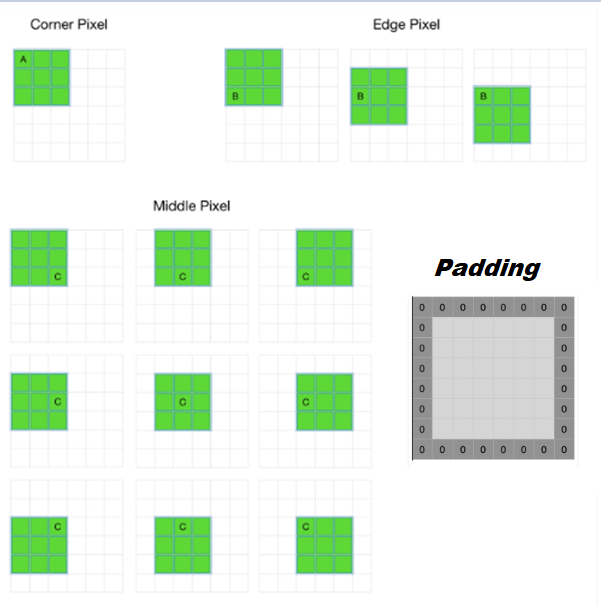

In [16]:
model=keras.models.Sequential()

In [17]:
model.add(keras.layers.Conv2D(32, (3,3), activation='relu',padding='same' ,input_shape=(32,32,3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.add(keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'))

**Sažimanje - pooling**

Cilj je smanjivanje rozolucije mapa značajki
*   Average Pooling:  Grupirani podaci zamjenjuju se aritmetičkom sredinom
*  Maximum Pooling (or Max Pooling):  Grupirani podaci zamjenjuju se maksimalnim vrijednostima

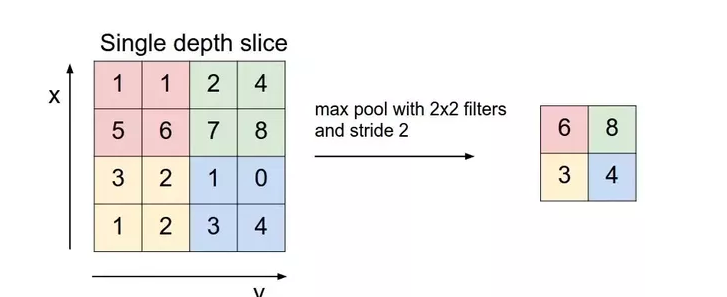



In [19]:
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

**Odbacivanje - dropout**

U svakom prolazu prilikom treniranja određeni postotak neurona odbacujemo, kako bi bili manje osjetljivi na promjene u ulaznim podacima i time spriječili overfitting.





In [21]:
model.add(keras.layers.Dropout(0.25))

In [22]:
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

In [23]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10, activation='softmax'))

## Treniranje  CNN-a

**EarlyStopping** će prekinuti treniranje ako se gubitak na validacijskom skupu ne poboljšava u XX epoha, a opcija restore_best_weights=True vraća težine modela na one koje su imale najmanji gubitak na validacijskom skupu.

In [33]:
model.compile(loss = 'categorical_crossentropy', # Corrected the typo in the loss function name
              optimizer = 'adam',
              metrics = ['accuracy'])

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3,
                               restore_best_weights=True)

In [35]:
# Treniranje modela s EarlyStoppingom
povijest_modela=model.fit(x_train, y_train_one_hot, batch_size=32,
                          epochs=20, validation_split=0.2,
                          callbacks = [early_stopping])

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.3220 - loss: 1.8178 - val_accuracy: 0.5699 - val_loss: 1.2041
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5615 - loss: 1.2131 - val_accuracy: 0.6406 - val_loss: 1.0046
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6394 - loss: 1.0257 - val_accuracy: 0.6920 - val_loss: 0.8786
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6710 - loss: 0.9242 - val_accuracy: 0.7067 - val_loss: 0.8395
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7026 - loss: 0.8406 - val_accuracy: 0.7192 - val_loss: 0.7996
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7206 - loss: 0.7855 - val_accuracy: 0.7386 - val_loss: 0.7589
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7414 - loss: 0.7281 - val_accuracy: 0.7504 - val_loss: 0.7213
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7543 - loss: 0.6

<function matplotlib.pyplot.show(close=None, block=None)>

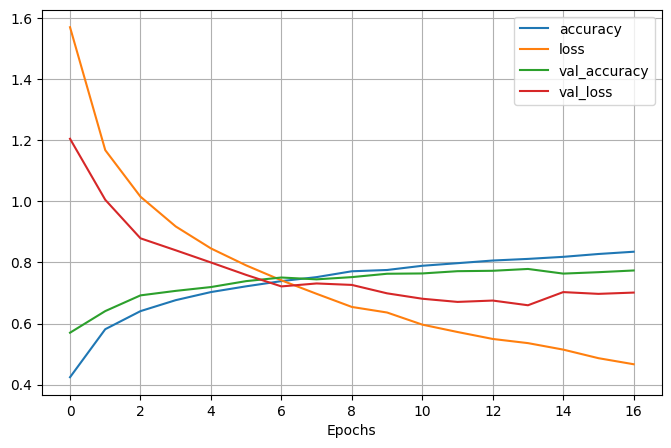

In [36]:
import pandas as pd
pd.DataFrame(povijest_modela.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel('Epochs')
plt.show

In [38]:
model.save('my_cifar_model.keras')

##Testiranje

In [39]:
model.evaluate(x_test, y_test_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7763 - loss: 0.6789


[0.6895400285720825, 0.7713000178337097]

In [40]:
predikcije_one_hot = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step


In [41]:
predikcije_one_hot

array([[4.87050536e-04, 4.87055149e-05, 3.21128545e-03, ...,
        9.99986223e-05, 5.40719852e-02, 1.39163421e-05],
       [6.27173795e-05, 2.93002844e-01, 8.14053339e-11, ...,
        1.39790557e-14, 7.06911981e-01, 2.24012911e-05],
       [1.13847768e-02, 1.24547824e-01, 1.67773804e-04, ...,
        1.47723122e-05, 8.62120450e-01, 1.58610323e-03],
       ...,
       [4.64931072e-05, 2.04390449e-06, 4.04049046e-02, ...,
        7.07751364e-02, 2.21890095e-05, 4.12631925e-05],
       [9.07265290e-04, 9.86546040e-01, 1.79699180e-03, ...,
        2.07031320e-04, 1.00309626e-06, 1.68383983e-03],
       [8.80947919e-12, 2.71201356e-12, 5.61625484e-07, ...,
        9.98996913e-01, 3.45978003e-11, 9.04026576e-11]], dtype=float32)

In [42]:
import numpy as np
y_pred=np.argmax(predikcije_one_hot,axis=-1)

In [43]:
broj_u_klasu = ['avion', 'automobil', 'ptica', 'mačka', 'jelen', 'pas', 'zaba', 'konj', 'brod', 'kamion']

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=broj_u_klasu))

              precision    recall  f1-score   support

       avion       0.79      0.80      0.80      1000
   automobil       0.88      0.87      0.88      1000
       ptica       0.70      0.66      0.68      1000
       mačka       0.60      0.59      0.60      1000
       jelen       0.69      0.76      0.72      1000
         pas       0.70      0.63      0.66      1000
        zaba       0.80      0.85      0.83      1000
        konj       0.84      0.82      0.83      1000
        brod       0.89      0.84      0.87      1000
      kamion       0.82      0.89      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



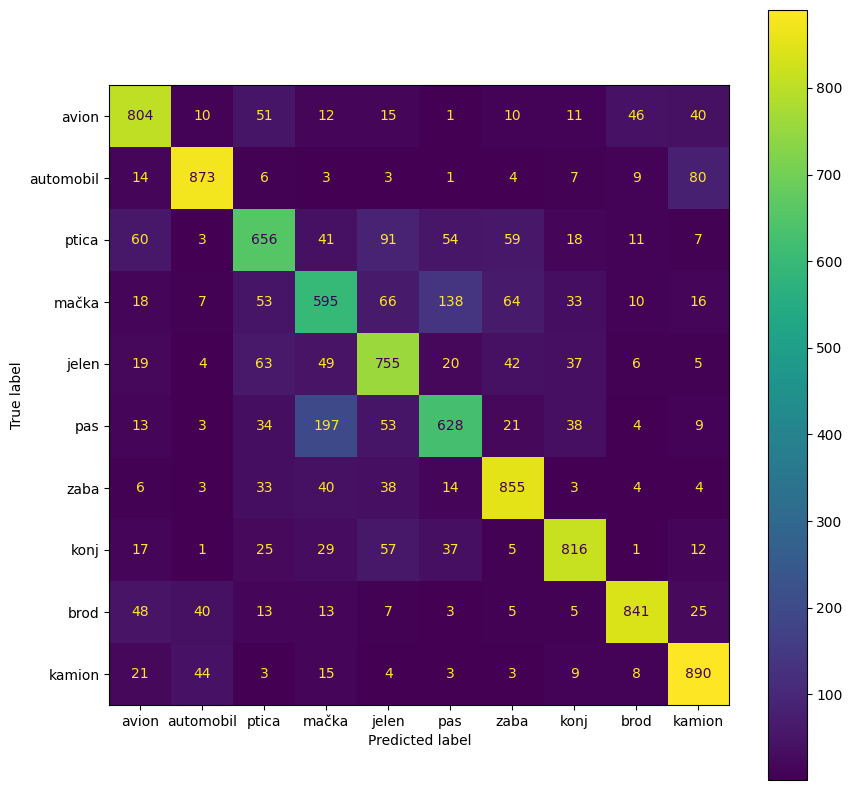

In [45]:
from sklearn import metrics
matrica_konfuzije = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrica_konfuzije, display_labels = broj_u_klasu)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.show()

### Testiranje na vlastitim slikama

In [63]:
!curl -o macka.jpg https://www.kucni-ljubimci.com/wp-content/uploads/2017/04/Sretna-maca.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 39037  100 39037    0     0  43960      0 --:--:-- --:--:-- --:--:-- 44010


In [64]:
slika = plt.imread('macka.jpg')
slika.shape

(428, 700, 3)

In [65]:
from skimage.transform import resize
slika_resized = resize(slika, (32,32,3))
slika_resized.shape

(32, 32, 3)

In [66]:
import numpy as np
vjerojatnosti = model.predict(np.array([slika_resized]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [67]:
vjerojatnosti[0]

array([6.8803685e-04, 2.6103824e-06, 1.8554782e-02, 8.0691862e-01,
       6.6526584e-02, 3.4337375e-02, 6.1441485e-02, 2.4957117e-03,
       5.3543388e-03, 3.6804043e-03], dtype=float32)

In [68]:
index = np.argsort(vjerojatnosti[0:])

In [61]:
for i in range(9,5,-1):
  print(broj_u_klasu[index[i]], ":", vjerojatnosti[0,index[i]])

IndexError: index 9 is out of bounds for axis 0 with size 1